# PREPARAZIONE 

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
def preparation(df):
    # Esegui le operazioni di manipolazione dei dati come desiderato    df = df.set_index('name')
    df['duration_min'] = df['duration_ms'] / 60000    
    colonne = df.columns.tolist()
    colonne = ['duration_min'] + [col for col in colonne if col != 'duration_min']    
    df = df[colonne]
    df = df.drop('duration_ms', axis=1)    
    df = df.drop(['popularity_confidence', 'time_signature', 'features_duration_ms', 'n_bars', 'n_beats'], axis=1)
    df['mode'] = df['mode'].fillna(1)  
    # Utilizzo fillna per sostituire i valori NaN con 1    
    return df
    # Carica il DataFrame dal file CSV
df = pd.read_csv('data/train.csv', skipinitialspace=True)
# Chiamata alla funzione con il DataFrame come argomento e assegnazione del DataFrame modificato a una nuova 
df1 = preparation(df)

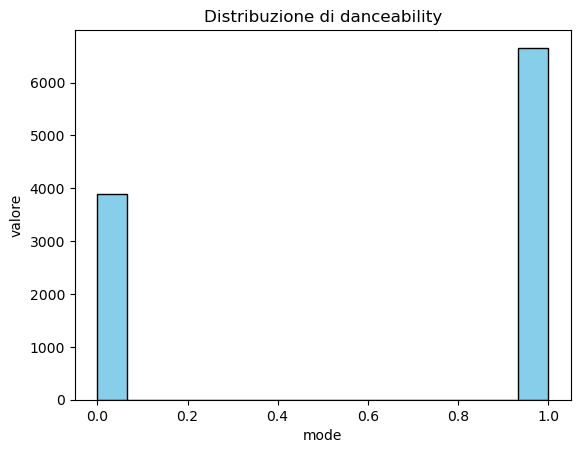

In [3]:
# Creazione dell'istogramma
plt.hist(df["mode"], bins=15, color='skyblue', edgecolor='black')

# Aggiunta di etichette e titolo
plt.xlabel('mode')
plt.ylabel('valore')
plt.title('Distribuzione di danceability')

# Mostrare l'istogramma
plt.show()

In [4]:
df1['target'] = df1['genre'].replace()
df1 = df1.drop('genre', axis=1)  

In [5]:
from sklearn.model_selection import train_test_split

# Escludi la colonna 'target' dalle caratteristiche
X = df1

# Imposta il target
y = X['target']

# Suddivisione tra dati di addestramento e dati di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [6]:
random_state = 0

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=random_state
)

In [8]:
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


NOTA: non andremo a normalizzare i dati, il decision tree non richiede la normalizzazione.

# DATA CLEANING

Non devono essere presenti missing value all'interno di Df1

In [9]:
df1.isnull().sum() 

duration_min        0
name                0
explicit            0
popularity          0
artists             0
album_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
processing          0
target              0
dtype: int64

### ***Removing useless variables***

Ho deciso di rimuovere: name, artists e album_name. 

In [10]:
column2drop = ['artists', 'name', 'album_name','explicit']
df1.drop(column2drop, axis=1, inplace=True)

In [11]:
df1.head()

,duration_min,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,processing,target
0,4.029333,46,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.53600,0.281,0.6350,142.221,1.279305,j-dance
1,7.400000,0,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.93400,0.360,0.0336,75.596,2.367412,iranian
2,5.558433,3,0.363,0.854,2,-7.445,1.0,0.0397,0.000089,0.80000,0.262,0.4890,116.628,3.700483,black-metal
3,4.496667,23,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.00127,0.117,0.3850,140.880,1.279305,bluegrass
4,5.127517,25,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.09690,0.299,0.6370,143.956,4.067086,happy


# PATITIONING 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
attributes = [col for col in df1.columns if col != 'target']
X = df1[attributes].values
y = df1['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# DECISION TREE

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [16]:
dt1 = DecisionTreeClassifier()

In [17]:
%%time
dt1.fit(X_train, y_train)

CPU times: total: 219 ms
Wall time: 221 ms


DecisionTreeClassifier()

In [18]:
#plt.figure(figsize=(20, 4), dpi=300)
#plot_tree(dt1, feature_names=attributes, filled=True)
#plt.show()

bello e comprensibile!

***ACCURACY***

In [19]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [20]:
y_train_pred = dt1.predict(X_train)
y_test_pred = dt1.predict(X_test)

In [21]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 1.0
Train F1-score [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Test Accuracy 0.4255555555555556
Test F1-score [0.24640657 0.61883408 0.46330275 0.30368764 0.29450549 0.48210024
 0.48637317 0.54954955 0.38901602 0.31192661 0.30701754 0.27391304
 0.54788419 0.42180095 0.44351464 0.35874439 0.72018349 0.24175824
 0.72727273 0.37367304]


COMMENTO: l'accuracy del train è 1.0 e l'accuracy del test è 0.43 (43%).

Certamente, ecco un commento sui risultati restituiti da quel codice:

1. **Train Accuracy 1.0:**

L'accuratezza sul set di addestramento è al 100%, il che potrebbe indicare un potenziale problema di overfitting. Un'accuratezza così alta suggerisce che il modello si è adattato perfettamente ai dati di addestramento, ma potrebbe avere difficoltà a generalizzare su nuovi dati.

2. **Train F1-score [1. 1. 1. ...]:**

Il punteggio F1 sul set di addestramento è 1 per tutte le classi, il che implica che il modello ha una precisione e un richiamo perfetti per ciascuna classe. Anche questo suggerisce un potenziale overfitting.

3. **Test Accuracy 0.42533333333333334:**

L'accuratezza sul set di test è del 43%, che è significativamente più bassa dell'accuratezza sul set di addestramento. Questa discrepanza potrebbe indicare che il modello non generalizza bene su nuovi dati.

4.**Test F1-score [valori variabili per ogni classe]:**

I punteggi F1 sul set di test variano notevolmente tra le classi. Questo potrebbe indicare che il modello ha prestazioni differenti per diverse classi. Alcune classi potrebbero essere predette con buona accuratezza (punteggi F1 più alti), mentre altre potrebbero avere prestazioni meno accurate (punteggi F1 più bassi).
In sintesi, i risultati mostrano un'indicazione chiara di overfitting, poiché il modello ha prestazioni perfette sul set di addestramento ma prestazioni molto peggiori sul set di test. Sarebbe utile esplorare strategie come la riduzione della complessità del modello, l'utilizzo di regolarizzazione o l'ottimizzazione degli iperparametri per migliorare le prestazioni del modello sul set di test e garantire una migliore capacità di generalizzazione.

In [22]:
print(classification_report(y_test, y_test_pred))

               precision    recall  f1-score   support

     afrobeat       0.23      0.27      0.25       225
  black-metal       0.62      0.61      0.62       225
    bluegrass       0.48      0.45      0.46       225
       brazil       0.30      0.31      0.30       225
    breakbeat       0.29      0.30      0.29       225
chicago-house       0.52      0.45      0.48       225
       disney       0.46      0.52      0.49       225
        forro       0.56      0.54      0.55       225
        happy       0.40      0.38      0.39       225
          idm       0.32      0.30      0.31       225
       indian       0.30      0.31      0.31       225
   industrial       0.27      0.28      0.27       225
      iranian       0.55      0.55      0.55       225
      j-dance       0.45      0.40      0.42       225
       j-idol       0.42      0.47      0.44       225
     mandopop       0.36      0.36      0.36       225
        sleep       0.74      0.70      0.72       225
      spa

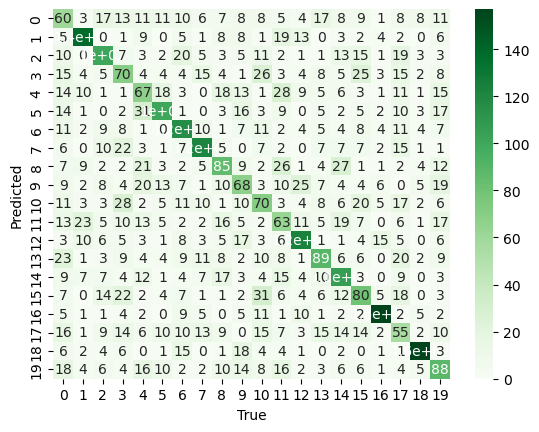

In [23]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

Feature Importance

In [24]:
zipped = zip(attributes, dt1.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

popularity 0.15065553539236914
duration_min 0.1066383787627467
danceability 0.09938043459782087
acousticness 0.09441292644278694
loudness 0.08289273039657227
valence 0.07616489944933225
tempo 0.07428451693978433
speechiness 0.06967348687554901
energy 0.06959257605126233
instrumentalness 0.06888659821689543
liveness 0.04757778870167263
key 0.026181828861788353
processing 0.026129454215179187
mode 0.007528845096240362


## Decision Tree hyperparameters

In [25]:
from sklearn.model_selection import cross_val_score

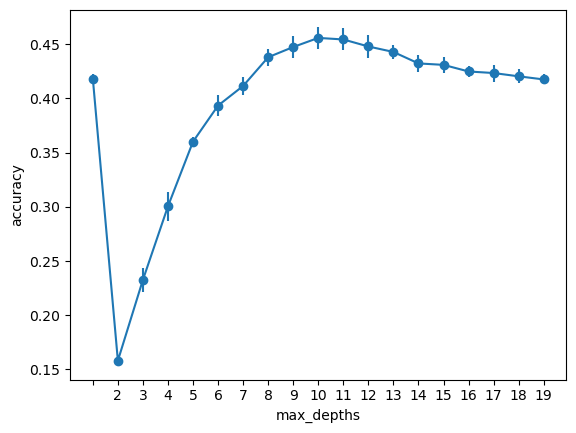

In [26]:
max_depths = [None] + list(np.arange(2, 20))
avg_scores = list()
std_scores = list()

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

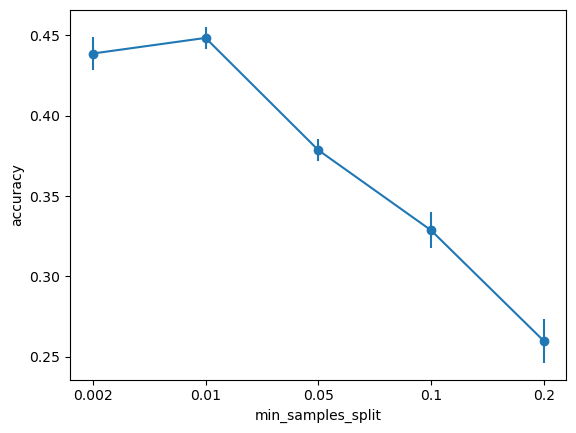

In [27]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
avg_scores = list()
std_scores = list()

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

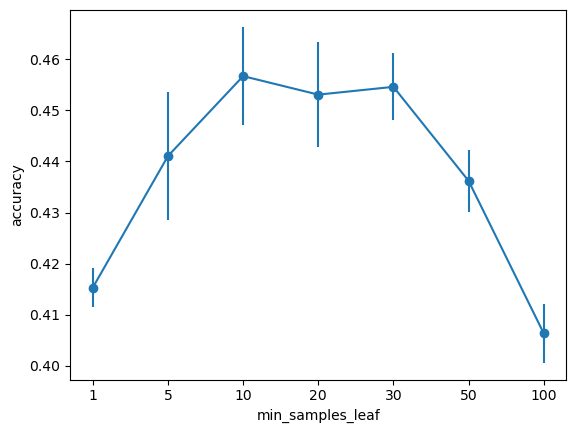

In [28]:
min_samples_leafs = [1, 5, 10, 20, 30, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

### Randomized Search

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [30]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

CPU times: total: 15.7 s
Wall time: 2min 10s


**Definizione dei parametri**: param_list è un dizionario che contiene una lista di iperparametri da esaminare durante la ricerca. In questo caso, vengono testate diverse combinazioni per max_depth, min_samples_split, min_samples_leaf, e criterion.

**Inizializzazione del classificatore**: clf è inizializzato come un Decision Tree Classifier con valori predefiniti per gli iperparametri.

**Randomized Search CV**: Si utilizza RandomizedSearchCV per eseguire una ricerca casuale sulle combinazioni di iperparametri definite in param_list. Questo strumento effettua una ricerca su una parte della griglia di iperparametri specificati, usando la cross-validation per valutare le prestazioni.

**Fit del modello**: random_search.fit(X_train, y_train) addestra il classificatore Decision Tree utilizzando i dati di addestramento (X_train, y_train) e valuta le varie combinazioni di iperparametri per trovare la migliore prestazione secondo la cross-validation.

**Assegnazione del miglior modello**: clf = random_search.best_estimator_ sostituisce il classificatore clf con il miglior estimatore trovato attraverso la ricerca casuale.

In [31]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 12, 'criterion': 'gini'} 0.45794285714285704


In [32]:
y_test_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.4742222222222222


In [33]:
clf.score(X_test, y_test)

0.4742222222222222

Questo metodo calcola l'accuratezza del classificatore sui dati di test: confronta le previsioni fatte dal modello sui dati di test con i valori reali in y_test e restituisce un punteggio che indica quanto bene il modello si comporta su questi dati sconosciuti.

L'output di clf.score(X_test, y_test) sarà un valore compreso tra 0 e 1, dove 1 rappresenta un'accuratezza perfetta, cioè tutte le previsioni sono corrette, mentre 0 indica che il modello non ha previsto correttamente nessun'istanza dei dati di test. Quindi, un valore più vicino a 1 indica un modello più accurato.







In [34]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 1.0
Train F1-score [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Test Accuracy 0.4742222222222222
Test F1-score [0.30555556 0.65271967 0.48497854 0.35294118 0.30454545 0.5177453
 0.52272727 0.61135371 0.44401544 0.36828645 0.32808989 0.26666667
 0.61702128 0.49765258 0.50471698 0.39578947 0.79090909 0.29959514
 0.76339286 0.43835616]


In [35]:
print(classification_report(y_test, y_test_pred))

               precision    recall  f1-score   support

     afrobeat       0.32      0.29      0.31       225
  black-metal       0.62      0.69      0.65       225
    bluegrass       0.47      0.50      0.48       225
       brazil       0.33      0.37      0.35       225
    breakbeat       0.31      0.30      0.30       225
chicago-house       0.49      0.55      0.52       225
       disney       0.53      0.51      0.52       225
        forro       0.60      0.62      0.61       225
        happy       0.39      0.51      0.44       225
          idm       0.43      0.32      0.37       225
       indian       0.33      0.32      0.33       225
   industrial       0.28      0.26      0.27       225
      iranian       0.59      0.64      0.62       225
      j-dance       0.53      0.47      0.50       225
       j-idol       0.54      0.48      0.50       225
     mandopop       0.38      0.42      0.40       225
        sleep       0.81      0.77      0.79       225
      spa

In [36]:
results = pd.DataFrame(random_search.cv_results_)

<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

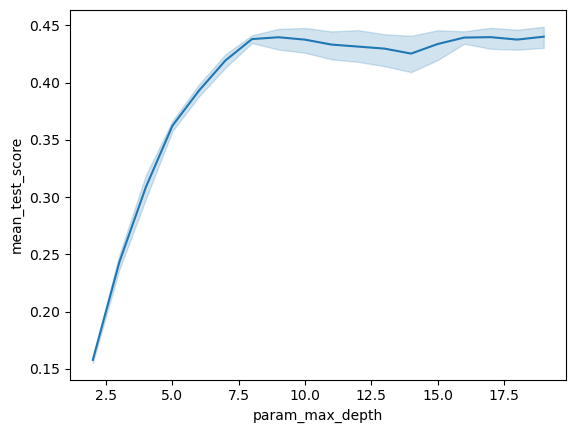

In [37]:
sns.lineplot(data=results, x="param_max_depth", y="mean_test_score")

<Axes: xlabel='param_min_samples_leaf', ylabel='mean_test_score'>

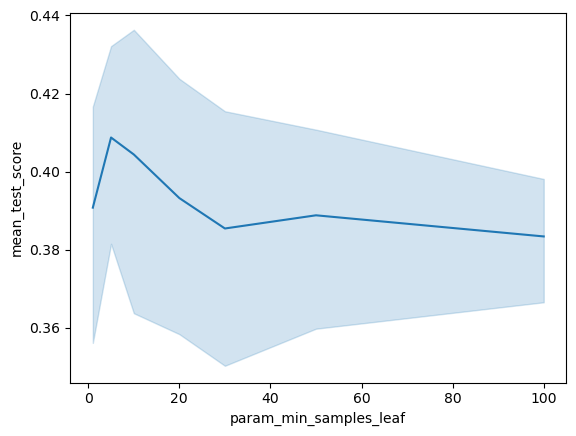

In [38]:
sns.lineplot(data=results, x="param_min_samples_leaf", y="mean_test_score")

In [39]:
zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

popularity 0.2220126166854469
duration_min 0.11982427729638451
danceability 0.11623484823665765
acousticness 0.11457491372485046
loudness 0.09038575459432231
instrumentalness 0.07663545141089492
valence 0.06869520709714734
energy 0.06055090538170396
tempo 0.05700260977611093
speechiness 0.05135607356941106
liveness 0.016118844607434936
processing 0.005186178715968164
key 0.001422318903666815
mode 0.0


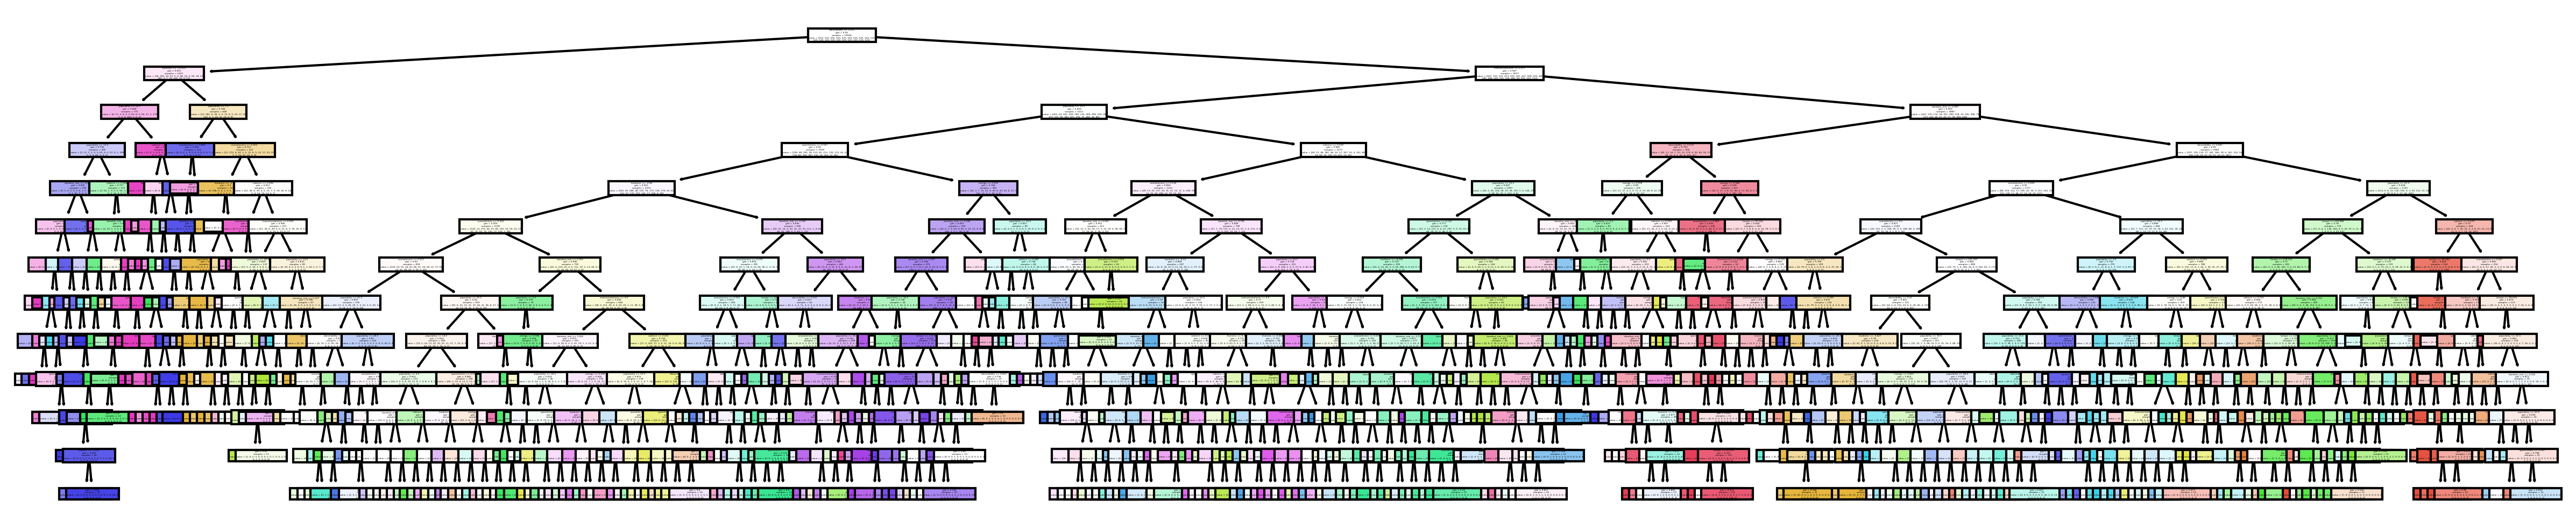

In [40]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(clf, feature_names=attributes, filled=True)
plt.show()

## potiamo?

ccp_alphas

In [41]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

**clf.cost_complexity_pruning_path(X_train, y_train)** calcola il percorso di potatura della complessità del costo sull'insieme di addestramento utilizzando l'X_train e il y_train forniti. Questo metodo restituisce il percorso di potatura, che contiene informazioni sugli alfa e le impurità per ciascun albero durante la potatura.

**ccp_alphas** sono gli alfa (fattori di complessità del costo) calcolati durante la potatura. Questi alfa rappresentano i valori di potatura possibili per l'albero.

**impurities** sono le impurità associate a ciascun albero durante il processo di potatura. Le impurità solitamente si riferiscono a una misura della "disordine" o dell'errore nell'albero decisionale.

In pratica, questo codice è utilizzato per estrarre gli alfa e le impurità associate alla potatura dell'albero decisionale. Questi valori possono essere utilizzati successivamente per selezionare l'ottimo alfa per potare l'albero in modo da ottenere le migliori prestazioni di generalizzazione senza sovradattamento ai dati di addestramento.

In [42]:
for alpha, imp in zip(ccp_alphas, impurities):
    print(alpha, imp)

0.0 0.5084485969279281
1.2479474548439878e-05 0.5084610764024765
1.4285714285714075e-05 0.5084753621167623
1.570593149540517e-05 0.5084910680482576
1.638231049995762e-05 0.5085074503587576
3.229813664596277e-05 0.5085397484954035
3.2967032967032815e-05 0.5085727155283706
3.33333333333334e-05 0.5086060488617039
3.33333333333334e-05 0.5086393821950372
3.673469387755114e-05 0.5086761168889148
3.990929705215428e-05 0.5087160261859669
4.029304029304023e-05 0.50875631922626
4.089635854341784e-05 0.5087972155848034
4.290212711265335e-05 0.5088401177119161
4.561026007209284e-05 0.5088857279719882
4.767634509868473e-05 0.5089334043170869
4.773902751430874e-05 0.5089811433446012
5.137480924351473e-05 0.5090325181538448
5.161290322580641e-05 0.5090841310570706
5.3030303030303025e-05 0.5091371613601009
5.476190476190435e-05 0.5091919232648628
5.532196618484816e-05 0.5094685330957871
5.85858585858586e-05 0.509527118954373
6.035106173164122e-05 0.5095874700161046
6.284520077623555e-05 0.509650315216

Questo è utile per esaminare visivamente gli alfa e le impurità associati al percorso di potatura dell'albero decisionale che hai calcolato in precedenza. Stampando questi valori, è possibile osservare la relazione tra gli alfa e le impurità e potrebbe essere d'aiuto per scegliere l'alfa ottimale per la potatura.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

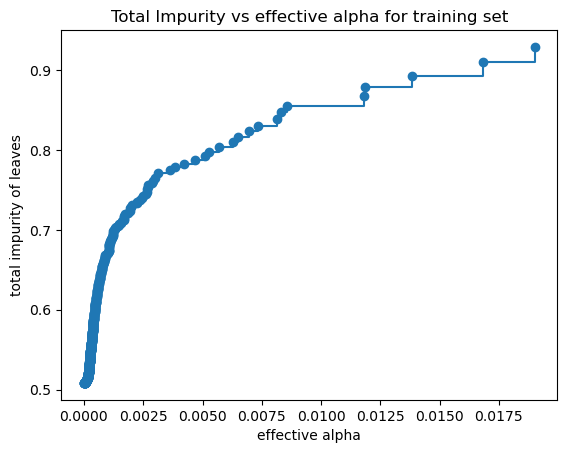

In [43]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Questo tipo di grafico è utile per visualizzare come l'impurità totale delle foglie cambia al variare degli alfa effettivi durante il processo di potatura. Potrebbe aiutare a identificare il punto in cui l'alfa ottimale potrebbe essere selezionato per ottenere un buon compromesso tra la complessità dell'albero e la sua capacità di generalizzazione.

L'alpha ottimale può essere identificato nel punto in cui l'impurità delle foglie è minima o vicina al minimo, mantenendo comunque un buon livello di generalizzazione.

Puoi cercare di identificare l'alpha ottimale guardando il punto in cui l'impurità delle foglie smette di diminuire significativamente o comincia a stabilizzarsi mentre l'alpha aumenta. Tuttavia, per una scelta accurata dell'alpha ottimale, potrebbe essere necessario eseguire la cross-validazione o utilizzare un insieme di dati di validazione per testare diverse impostazioni di alpha e valutare le prestazioni dell'albero decisionale su dati non visti.

### cross validation

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Crea un DecisionTreeClassifier (sostituisci con i parametri desiderati)
clf = DecisionTreeClassifier()

# Esegui la cross-validation con 5 fold (k=5)
# X è il tuo insieme di dati, y sono i relativi target
scores = cross_val_score(clf, X, y, cv=5)

# Stampa i punteggi ottenuti dalla cross-validation
print("Scores:", scores)
print("Mean accuracy:", np.mean(scores))


Scores: [0.43933333 0.41733333 0.43133333 0.42933333 0.41833333]
Mean accuracy: 0.42713333333333336


### migliori parametri

In [45]:
random_search.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_depth': 12,
 'criterion': 'gini'}

In [46]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, **random_search.best_params_)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.021193438258497288


si desidera esplorare come la complessità dell'albero decisionale varia al variare del parametro ccp_alpha. Potrebbe essere utilizzato per selezionare manualmente un valore ottimale di ccp_alpha in base a determinati criteri come la complessità dell'albero o le prestazioni del modello su un insieme di dati di validazione.

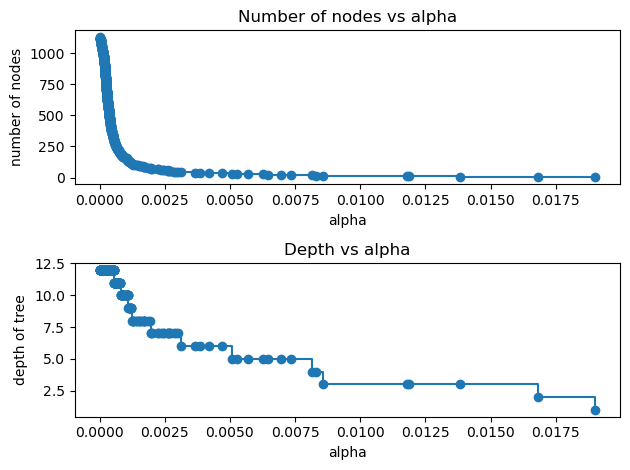

In [47]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

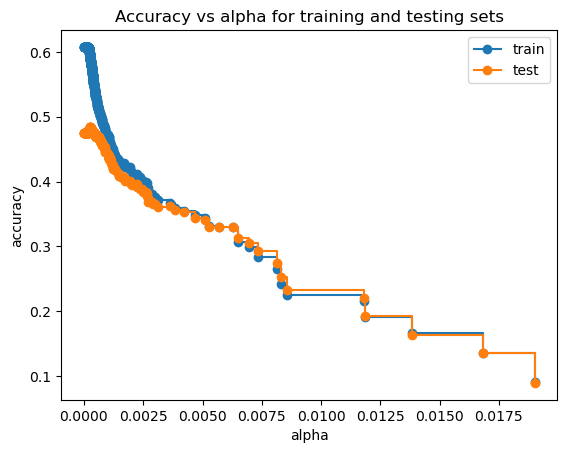

In [48]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [49]:
dtp = DecisionTreeClassifier(random_state=0, ccp_alpha=0.006, **random_search.best_params_)
dtp.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006, max_depth=12, min_samples_leaf=10,
                       min_samples_split=5, random_state=0)

In [50]:
y_test_pred = dtp.predict(X_test)

In [51]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 1.0
Train F1-score [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Test Accuracy 0.3293333333333333
Test F1-score [0.         0.62643678 0.28982036 0.06060606 0.         0.46863469
 0.         0.38148668 0.         0.         0.         0.20597322
 0.53968254 0.46315789 0.4180602  0.3342246  0.76214834 0.
 0.57861635 0.33753149]


Brrutto risultato per lo stesso motivo di prima, anzi peggiore accuracy del test.

In [52]:
y_test_pred = dtp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.3293333333333333


In [53]:
print(classification_report(y_test, y_test_pred, zero_division=1))


               precision    recall  f1-score   support

     afrobeat       1.00      0.00      0.00       225
  black-metal       0.89      0.48      0.63       225
    bluegrass       0.20      0.54      0.29       225
       brazil       0.10      0.04      0.06       225
    breakbeat       1.00      0.00      0.00       225
chicago-house       0.40      0.56      0.47       225
       disney       1.00      0.00      0.00       225
        forro       0.28      0.60      0.38       225
        happy       1.00      0.00      0.00       225
          idm       1.00      0.00      0.00       225
       indian       1.00      0.00      0.00       225
   industrial       0.13      0.44      0.21       225
      iranian       0.55      0.53      0.54       225
      j-dance       0.44      0.49      0.46       225
       j-idol       0.34      0.56      0.42       225
     mandopop       0.24      0.56      0.33       225
        sleep       0.90      0.66      0.76       225
      spa

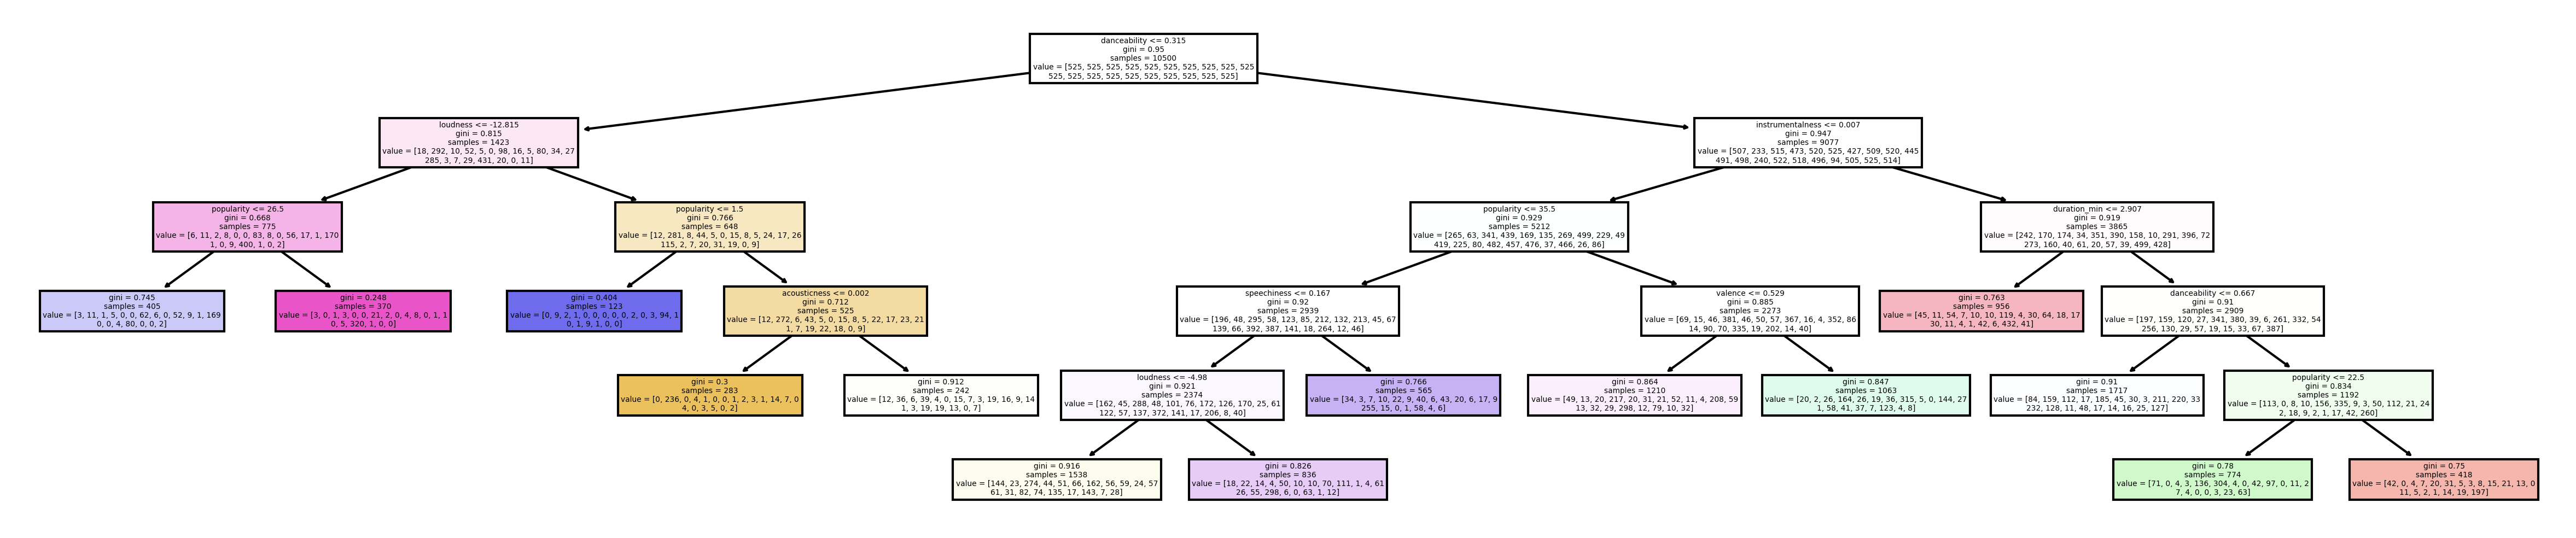

In [54]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dtp, feature_names=attributes, filled=True)
plt.show()

# ROC

In [55]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

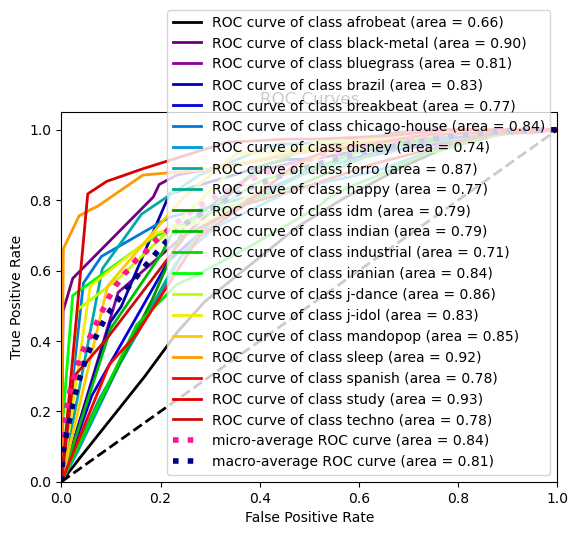

In [56]:
plot_roc(y_test, dtp.predict_proba(X_test))
plt.show()

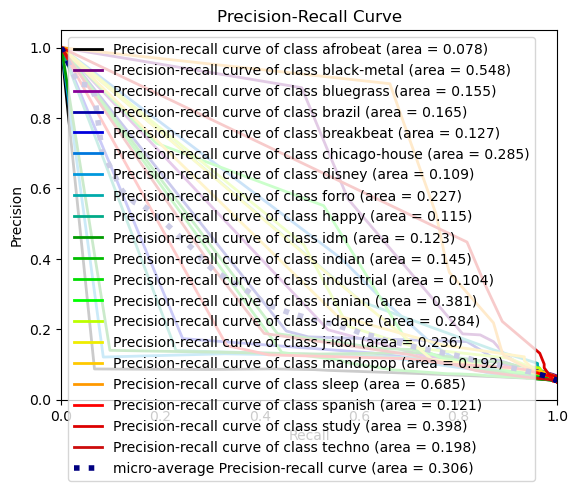

In [57]:
plot_precision_recall(y_test, dtp.predict_proba(X_test))
plt.show()